# Introduction to openBCI

## Initial set-up
Below, we see the initial set up needed, aka, the required packages and libraries that you will need to install to make this code work prior to running the rest of the functions hereby made available.

In [8]:
# install the needed packages|
!pip install brainflow
!pip install numpy
!pip install pandas
!pip install PyQt5
#comment de pruebas

     ---------------------------------------- 28.7/28.7 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 45.1/45.1 kB 117.2 kB/s eta 0:00:00


In [1]:
# import the funtions we have placed in the file named functions_openBCI
from functions_openBCI import *

# Import packages
import pandas as pd
import time
import brainflow
import numpy
import PyQt5


## Create board connection

In [2]:
btype = "other"
cyton = open_board(btype)

try:
    time.sleep(2)
    signal = cyton.get_board_data(); 
    time.sleep(2)
    signal = cyton.get_board_data(); 
    #signal_acquisition(cyton)
except KeyboardInterrupt: 
    print('User interrupted the signal acquisition.') # keyboard interrupt in jupyter labs is i i (yes, twice), and in terminal it is ctrl+c

close_board(cyton)

Connection to Cyton board established successfully!
Session ended


In [4]:
print(signal)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.42000000e+02
  2.43000000e+02 2.44000000e+02]
 [1.17963468e+01 1.34361777e+01 1.49933330e+01 ... 8.30699150e+00
  1.00000000e+01 1.18509451e+01]
 [2.76951118e+01 3.54991758e+01 4.10481613e+01 ... 1.42296985e+01
  2.13502697e+01 2.79692143e+01]
 ...
 [9.52203454e+01 9.35422855e+01 8.40873079e+01 ... 8.09438721e+01
  8.56344832e+01 9.15910204e+01]
 [1.70916308e+09 1.70916308e+09 1.70916308e+09 ... 1.70916308e+09
  1.70916308e+09 1.70916308e+09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


C:\Users\luisf\AppData\Local\Temp\ipykernel_30620\2695624983.py:11: DeprecationWarning: sipPyTypeDict() is deprecated, the extension module should use sipPyTypeDictRef() instead
  class PlotUpdater(QMainWindow):


Connection to Cyton board established successfully!
window opened
entering sleep
done sleeping
window should be closed by now
Session ended


SystemExit: 0

C:\Users\luisf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


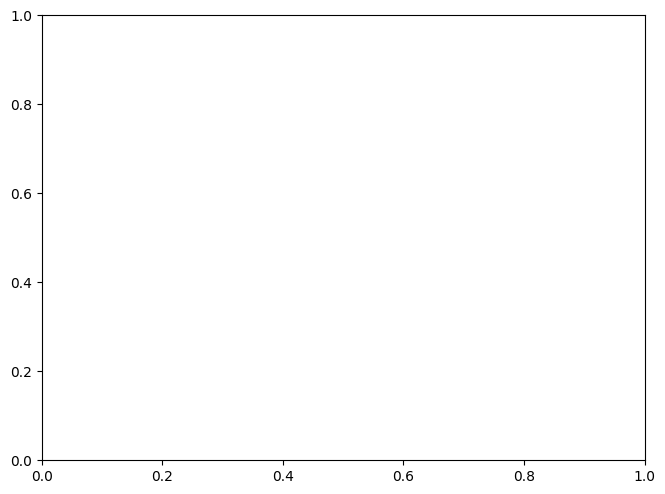

In [1]:
import sys
from functions_openBCI import *

import random
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget
from PyQt5.QtCore import QTimer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

class PlotUpdater(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Dynamic Plot with PyQt")
        self.setGeometry(100, 100, 800, 600)

        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)

        self.layout = QVBoxLayout()
        self.central_widget.setLayout(self.layout)

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.fig)
        self.layout.addWidget(self.canvas)

        self.data = []
        
    def update_data(self, data):
        self.data = data
    def update_plot(self):
        # Generate random data for the plot
        x = self.data
        y = [range(len(self.data))]

        # Clear previous plot
        self.ax.clear()

        # Plot new data
        self.ax.plot(x, y)

        # Update canvas
        self.canvas.draw()
    def quit(self):
        app.quit
        
# def plot_main():
#    app = QApplication(sys.argv)
#    window = PlotUpdater()
#    window.show()
#    sys.exit(app.exec_())

# if __name__ == "__main__":
#    main()

btype = "other"
cyton = open_board(btype)

try:
    time.sleep(1)
    signal = cyton.get_board_data(); 
    
    app = QApplication(sys.argv)
    
    window = PlotUpdater()
    print("window opened")
    window.update_data(signal)
    window.show()
    window.update_plot()
    print("entering sleep")
    time.sleep(50)
#     signal = cyton.get_board_data(); 
    
#     window.update_data(signal)
#     window.show()
#     sys.exit(app.exec_())
    #signal_acquisition(cyton)
    print("done sleeping")
    
    
    print("window should be closed by now")
except SystemExit: 
    print('User interrupted the signal acquisition.') # keyboard interrupt in jupyter labs is i i (yes, twice), and in terminal it is ctrl+c

close_board(cyton)

sys.exit(app.exec_())

In [5]:
close_board(cyton)

BrainFlowError: BOARD_NOT_CREATED_ERROR:15 unable to stop streaming session

# REFERENCE CODE FOR WINDOW

In [ ]:
import sys
import random
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget
from PyQt5.QtCore import QTimer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

class PlotUpdater(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Dynamic Plot with PyQt")
        self.setGeometry(100, 100, 800, 600)

        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)

        self.layout = QVBoxLayout()
        self.central_widget.setLayout(self.layout)

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.fig)
        self.layout.addWidget(self.canvas)

        self.data = []

        # Create a timer to update the plot every 2 seconds
        self.timer = QTimer()
        self.timer.timeout.connect(self.update_plot)
        self.timer.start(2000)  # Interval is in milliseconds (2000 ms = 2 seconds)

    def update_plot(self):
        # Generate random data for the plot
        x = np.arange(len(self.data))
        y = [random.randint(0, 10) for _ in range(len(self.data))]

        # Clear previous plot
        self.ax.clear()

        # Plot new data
        self.ax.plot(x, y)

        # Update canvas
        self.canvas.draw()

        # Append data for the next update
        self.data.append(random.randint(0, 10))

def main():
    app = QApplication(sys.argv)
    window = PlotUpdater()
    window.show()
    sys.exit(app.exec_())

if __name__ == "__main__":
    main()


C:\Users\luisf\AppData\Local\Temp\ipykernel_30620\1521742103.py:9: DeprecationWarning: sipPyTypeDict() is deprecated, the extension module should use sipPyTypeDictRef() instead
  class PlotUpdater(QMainWindow):


SystemExit: 0

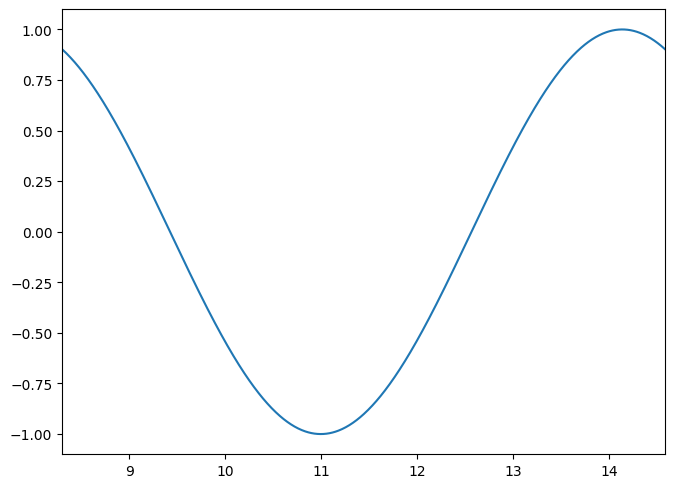

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QMainWindow, QApplication, QVBoxLayout, QWidget
from PyQt5 import QtCore


class PlotUpdater(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Moving Sine Wave")
        self.setGeometry(100, 100, 800, 600)

        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)

        self.layout = QVBoxLayout()
        self.central_widget.setLayout(self.layout)

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.fig)
        self.layout.addWidget(self.canvas)

        self.x = np.linspace(0, 2 * np.pi, 1000)
        self.y = np.sin(self.x)

        self.line, = self.ax.plot(self.x, self.y)
        self.animation_timer = QtCore.QTimer(self)
        self.animation_timer.timeout.connect(self.update_plot)
        self.animation_timer.start(50)  # Update plot every 50 milliseconds

    def update_plot(self):
        # Shift the sine wave to the right
        self.x += 0.1
        self.y = np.sin(self.x)

        # Update the data of the line plot
        self.line.set_xdata(self.x)
        self.line.set_ydata(self.y)

        # Adjust plot limits to keep the sine wave visible
        self.ax.set_xlim(self.x.min(), self.x.max())
        self.ax.set_ylim(-1.1, 1.1)

        # Redraw the plot
        self.canvas.draw()


if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = PlotUpdater()
    window.show()
    sys.exit(app.exec_())